In [15]:
from plotnine import *
import pandas
from solarized import *

df = pandas.DataFrame(data={
    'workflow':['module4', 'badkaggle']*3,
    'Optimization method':['none']*2 + ['modin']*2 + ['p2d2']*2,
    'wall_time': [100,100,80,80,60,100],
    'db_time': [50,50,50,50,40,50]})
workflow_cat = pworkflow_cat = pandas.CategoricalDtype(categories=['module4', 'tpch', 'badkaggle'], ordered=True)
df['workflow'] = df['workflow'].astype(workflow_cat)
df['workflow'] = df['workflow'].astype(workflow_cat)
df['python_time'] = df['wall_time'] - df['db_time']
df = df.melt(id_vars=['workflow', 'Optimization method'], value_vars=['python_time', 'db_time'])

In [16]:
variable_cat = pandas.CategoricalDtype(categories=['python_time', 'db_time'], ordered=True)
df['variable'] = df['variable'].astype(variable_cat)
cdict={'python_time': C_BLUE,
       'db_time': C_GREEN
}
df.rename(columns={'value':'Execution time %'}, inplace=True)

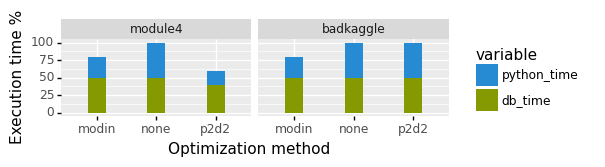

<ggplot: (176244932849)>

In [17]:
(
    ggplot(df, aes('Optimization method', y='Execution time %', fill='variable'))
    + geom_col(width=0.3)
    + scale_fill_manual(values=cdict) 
    + facet_wrap('workflow')
    + theme(figure_size=(5, 1))
)


In [18]:
optimization_time=pandas.DataFrame({'module4':[0.05], 'tpch':[0.06], 'badkaggle': [0.001]})

In [19]:
optimization_time

,module4,tpch,badkaggle
0,0.05,0.06,0.001


In [20]:
net_df = pandas.DataFrame(data={
    'workflow':['module4', 'badkaggle']*3,
    'Optimization method':['none']*2 + ['modin']*2 + ['p2d2']*2,
    'Network Usage in %': [100,100,100,100,20,100]})
workflow_cat = pandas.CategoricalDtype(categories=['module4', 'tpch', 'badkaggle'], ordered=True)
net_df['workflow'] = net_df['workflow'].astype(workflow_cat)

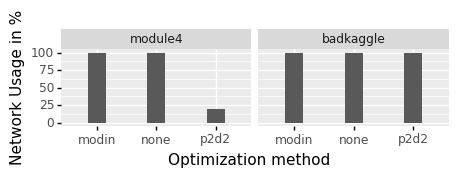

<ggplot: (176244338740)>

In [21]:
(
    ggplot(net_df, aes('Optimization method', y='Network Usage in %'))
    + geom_col(width=0.3)
    + facet_wrap('workflow')
    + theme(figure_size=(5, 1))
)

In [22]:
mem_df = pandas.DataFrame(data={
    'workflow':['module4', 'badkaggle']*3,
    'Optimization method':['none']*2 + ['modin']*2 + ['p2d2']*2,
    'Memory usage in %': [90,90,100,100,20,90],
    'db_ratio': [0.7,1,1.3]*2})
workflow_cat = pandas.CategoricalDtype(categories=['module4', 'tpch', 'badkaggle'], ordered=True)
mem_df['workflow'] = mem_df['workflow'].astype(workflow_cat)


mem_df_ext = pandas.DataFrame()
for idx, row in mem_df.iterrows():
    for time, factor in enumerate((0.6, 1, 0.8)):
        new_row = row.copy()
        new_row['Memory usage in %'] = new_row['Memory usage in %']*factor
        new_row['time']=time
        mem_df_ext = mem_df_ext.append(new_row)
mem_df = mem_df_ext
del mem_df_ext

mem_df['color']=C_BLUE
dummy_df=mem_df.copy()
dummy_df['color'] = C_GREEN

# workflow_cat = pandas.CategoricalDtype(categories=['0', '1', '2'], ordered=True)
# mem_df['time'] = mem_df['time'].astype(workflow_cat)

In [42]:
dummy_df.groupby('workflow').reset_index()

AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

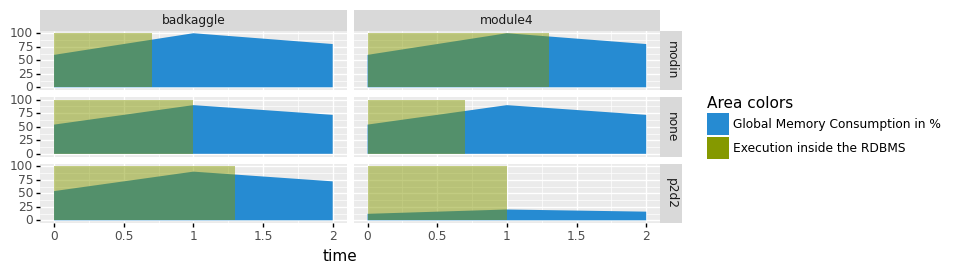

<ggplot: (176246894656)>

In [33]:
(
    ggplot(mem_df, aes('time', y='Memory usage in %'))
    + geom_area(aes(fill='color'))
    + geom_rect(aes(xmax='db_ratio', fill='color'), adf, xmin=0,ymin=0,ymax=100,
               alpha=0.2)
    + facet_grid('Optimization method ~ workflow')
    + theme(figure_size=(8, 2.5))
    + labs(y=None)
    + scale_fill_identity(name = 'Area colors', guide = 'legend',labels = ('Global Memory Consumption in %', 'Execution inside the RDBMS')) 
    # + scale_colour_manual(name = 'the colour', 
    #     values ={'black':'white','red':'blue'}, labels = ('c2','c1'))
)

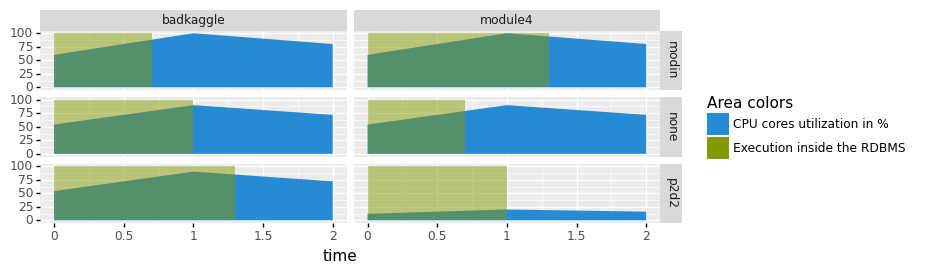

<ggplot: (176246404395)>

In [24]:
(
    ggplot(mem_df, aes('time', y='Memory usage in %'))
    + geom_area(aes(fill='color'))
    + geom_rect(aes(xmax='db_ratio', fill='color'), dummy_df, xmin=0,ymin=0,ymax=100,
               alpha=0.2)
    + facet_grid('Optimization method ~ workflow')
    + theme(figure_size=(8, 2.5))
    + labs(y=None)
    + scale_fill_identity(name = 'Area colors', guide = 'legend',labels = ('CPU cores utilization in %', 'Execution inside the RDBMS')) 
    # + scale_colour_manual(name = 'the colour', 
    #     values ={'black':'white','red':'blue'}, labels = ('c2','c1'))
)